# Customer Analysis Case

## **Libraries:**

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

## Content notes:

### Files relative paths:

In [162]:
file1 = "file1.csv"
file2 = "file2.csv"
file3 = "Data_Marketing_Customer_Analysis_Round2.csv"

### Changes record

**Data set construction:**
- File1: 4008 rows, 11 columns
- File2: 996 rows, 11 columns
- data set (file1+file2): 5004 rows, 11 columns (4008+996=5004)
- data after removal from duplicates: 2065 rows, 11 columns

**Column names standardization:**

Column names before change:
- 'Customer', 'ST', 'GENDER', 'Education', 'Customer Lifetime Value','Income', 'Monthly Premium Auto', 'Number of Open Complaints','Policy Type', 'Vehicle Class', 'Total Claim Amount'
- Number of columns before names change: 11

Column names after change:
- customer', 'state', 'gender', 'education', 'customer_lifetime_value', 'income', 'monthly_premium_auto', 'number_of_open_complaints','policy_type', 'vehicule_class', 'total_claim_amount'
- Number of columns after names change: 11


**State column, names standardization:**

State names before change:
- Washington', 'Arizona', 'Nevada', 'California', 'Oregon', 'Cali','AZ', 'WA', nan
- Rows count: 2065

State names after change:
- 'WA', 'AZ', 'NV', 'CA', 'OR', nan
- Rows count: 2065

**Removing all rows which have only NaN values:**
- rows count before removal: 2065
- rows count after removal: 2064


**Gender column, names standardization:**

Gender values before change:
- 'F', 'M', 'Femal', 'Male', 'female', nan
- Rows count: 2064

Gender after change:
- 'F', 'M', nan
- Rows count: 2064


**Gender column, names standardization:**

Values before change:
- 'Master', 'Bachelor', 'High School or Below', 'College', 'Bachelors', 'Doctor'
- Rows count: 2064

Values after change:
- 'Master', 'Bachelor', 'High School or Below', 'College', 'Doctor'
- Rows count: 2064

**number_of_open_complaints column unique values**
- before replacement of the column:\
Value     Count\
1/0/00    1623\
1/1/00     247\
1/2/00      93\
1/3/00      60\
1/4/00      29\
1/5/00      12

- after replacement of the column:\
Value  Count\
0      1623\
1      247\
2      93\
3      60\
4      29\
5      12


## **Functions:**

### Get data:

In [304]:
#### read a file:
def get_data_set(file1):             
    return pd.read_csv(file1)

#### combine with dataframe from file2:
def concat_data_set2(data): 
    df2 = pd.read_csv("file2.csv")
    return pd.concat([data,df2])

    

#### merging (outer join) with file3
def merge_for_time_values(data):
    df3 = pd.read_csv("Data_Marketing_Customer_Analysis_Round2.csv")
    df3.rename(
        columns={
        "Customer":"customer",
        "Response":"response",
        "Coverage":"coverage",
        "Effective To Date":"effective_to_date",
        "EmploymentStatus":"employment_status",
        "Number of Policies":"number_of_policies",
        "Policy":"policy",
        "Renew Offer Type":"renew_offer_type",
        "Sales Channel":"sales_channel",
        "Vehicle Size":"vehicle_size",
        "State": "state",
        "Customer Lifetime Value": "customer_lifetime_value",
        "Education": "education",
        "Gender": "gender",
        "Income": "income",
        "Location Code": "location_code",
        "Marital Status": "marital_status",
        "Monthly Premium Auto": "monthly_premium_auto",
        "Months Since Last Claim": "months_since_last_claim",
        "Months Since Policy Inception": "months_since_last_policy_inception",
        "Number of Open Complaints": "number_of_open_complaints",
        "Policy Type": "policy_type",
        "Total Claim Amount": "total_claim_amount",
        "Vehicle Class": "vehicule_class",
        "Vehicle Type": "vehicule_type"
        }, inplace=True
    )
    data = pd.merge(data,df3, on=(
        ["customer",
        "state",
        "gender",
        "education",
        "customer_lifetime_value",
        "income",
        "monthly_premium_auto",
        "number_of_open_complaints",
        "policy_type",
        "vehicule_class",
        "total_claim_amount",
        ]
    ),
                    how="outer", indicator=True)
    return data

### Data cleaning:

In [311]:
### removing duplicates:
def remove_duplicates(data):
    return data.drop_duplicates()

### renaming columns
def rename_columns(data):
    return data.rename(
        columns={"Customer":"customer",
        "ST":"state",
        "GENDER":"gender",
        "Education":"education",
        "Customer Lifetime Value":"customer_lifetime_value",
        "Monthly Premium Auto":"monthly_premium_auto",
        "Income":"income",
        "Number of Open Complaints":"number_of_open_complaints",
        "Policy Type":"policy_type",
        "Vehicle Class":"vehicule_class",
        "Total Claim Amount":"total_claim_amount"
                }
    )


### cleaning up state names
def clean_up_states(data):
    dict = {
        "Oregon": "OR",
        "California": "CA",
        "Arizona": "AZ",
        "Nevada": "NV",
        "Washington": "WA",
        "Cali": "CA"
        }
    return data.replace({"state": dict})


### droping all rows which have only Nan values
def drop_full_nan(data):
    return data.dropna(axis=0, how="all")

### stardardizing gender column
def standardize_gender_values(data):
    dict = {
        "Male": "M",
        "female": "F",
        "Femal": "F",
        }
    return data.replace({"gender": dict})


### stardardizing education column
def standardize_education_values(data):
    dict = {
        "Bachelors": "Bachelor",
        }
    return data.replace({"education": dict})


### removing % character from the customer_lifetime_value_column
def remove_percent(data):
    data["customer_lifetime_value"] = data["customer_lifetime_value"].str.replace("%","")
    return data

### setting the customer_lifetime_value column to numeric type
def set_cslifetimevalue_to_numeric(data):
    data["customer_lifetime_value"] = pd.to_numeric(data["customer_lifetime_value"], errors = "coerce")
    return data

### replacing the number_of_open_complaints columns with a new column with the correct values
def number_of_open_complaints_cleanup(data):
    data["number_of_open_complaints"] = data["number_of_open_complaints"].str[2]
    return data


### setting the number_of_open_complaints column to numeric type
def set_nbofopencomplaints_to_numeric(data):
    data["number_of_open_complaints"] = pd.to_numeric(data["number_of_open_complaints"], errors = "coerce")
    return data


### rounding-up total_claim_amount_column
def roundup_total_claim_amount(data):
    data["total_claim_amount"] = data["total_claim_amount"].round(decimals=2)
    return data

### replacing NaN values of gender column with "missing" and by the mean for customer_lifetime_value
def replace_nan_values(data):
    data["gender"] = data["gender"].fillna("missing")
    data["customer_lifetime_value"] = data["customer_lifetime_value"].fillna(data["customer_lifetime_value"].mean()).round(decimals=2)
    return data


### bucketing states per region
def states_buckets(data):
    dict = {
        "CA": "West Region",
        "OR": "North West",
        "WA": "East",
        "AZ": "Central",
        "NV":  "Central",
        }
    data.insert(2,"region",data["state"])
    data.replace({"region": dict}, inplace=True)
    return data


### setting effective_to_date column to datetime type
def set_time_column_to_datetime(data):
    data["effective_to_date"] = pd.to_datetime(data["effective_to_date"])
    return data


### extracting month from the effective_tot_date column into a new column names "month"
def extract_month(data):
    data.insert(16, "month", pd.DatetimeIndex(data['effective_to_date']).month)
    return data

### Data set description:

In [344]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12974 entries, 0 to 12973
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   customer                            12974 non-null  object        
 1   state                               12343 non-null  object        
 2   region                              2064 non-null   object        
 3   gender                              12974 non-null  object        
 4   education                           12974 non-null  object        
 5   customer_lifetime_value             12974 non-null  float64       
 6   income                              12974 non-null  float64       
 7   monthly_premium_auto                12974 non-null  float64       
 8   number_of_open_complaints           12341 non-null  float64       
 9   policy_type                         12974 non-null  object        
 10  vehicule_class        

## **Pipeline controller:**

In [343]:
data = (
    get_data_set(file1)                   #### getting data from file1
.pipe(concat_data_set2)                   #### appending data from dataset2
.pipe(remove_duplicates)                  #### removing duplicates
.pipe(rename_columns)                     #### renaming columns
.pipe(clean_up_states)                    #### normalizing state names
.pipe(drop_full_nan)                      #### droping all columns which have only NaN values
.pipe(standardize_gender_values)          #### standardizing gender column values
.pipe(standardize_education_values)       #### standardizing education column values
.pipe(remove_percent)                     #### removing the % from the customer_lifetime_value column
.pipe(set_cslifetimevalue_to_numeric)     #### setting customer_lifatime_value column to numeric
.pipe(number_of_open_complaints_cleanup)  #### cleaning-up number_of_open_complaints column
.pipe(set_nbofopencomplaints_to_numeric)  #### setting number_of_open_complaints column to numeric
.pipe(roundup_total_claim_amount)         #### rounding-up values in the total_claim_amount column
.pipe(replace_nan_values)                 #### replacing NaN values
.pipe(states_buckets)                     #### buceking states per region
.pipe(merge_for_time_values)              #### outer join to merge with new data set (file3) with time values
.pipe(remove_duplicates)                  #### removing duplicates after merge
.pipe(set_time_column_to_datetime)        #### setting column effective_to_date to datetime
.pipe(extract_month)                      #### extracting month from the effective_tot_date column into a new column names "month"
)

## Total number of responses

<AxesSubplot:title={'center':'Number of responses'}, ylabel='response'>

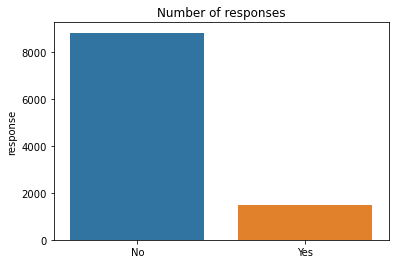

In [347]:
plot = data["response"].value_counts()
fig1, ax1 = plt.subplots()
ax1.set_title("Number of responses")
sns.barplot(x=plot.index, y=plot)

## Number of responses by sales channel

<AxesSubplot:title={'center':'Number of responses by sales channel'}, xlabel='sales_channel', ylabel='customer'>

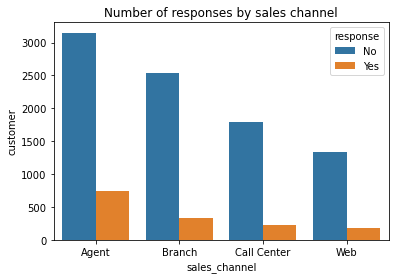

In [361]:
plot2 = data.groupby(["sales_channel","response"])["customer"].count().reset_index()
plot2

fig2, ax2 = plt.subplots()
ax2.set_title("Number of responses by sales channel")
sns.barplot(x=plot2["sales_channel"], y=plot2["customer"], hue=plot2["response"])